# Luenberger State Observer

In [523]:
import numpy as np
import matplotlib.pyplot as plt
import control

Using System from 01

In [524]:
A = np.matrix('0 1; -2 -1.5')
B = np.matrix("1; 0")
C = np.matrix("1 0")
D = 0
sys = control.ss(A, B, C, D)  # Creating the state space object

First check is the system is observable

In [525]:
# Check system observability
observability_matrix = control.obsv(A, C)
observability_rank = np.linalg.matrix_rank(observability_matrix)
states = A.shape[0]

if observability_rank == states:
    print("The system is observable.")
else:
    print("The system is not observable. Cannot design observer.")

The system is observable.


In [526]:
# Get the fastest pole of System
fast_pole = max(abs(control.poles(sys)))
print(f"Fastest system pole: {-fast_pole}")
observer_poles = [-3*fast_pole, -3*fast_pole-5]  # Multiplying with a negative number since abs from fastest pole give unstable pole
L = control.place(A.T, C.T, observer_poles)  # .T transposes the matrices
print(f"Observer feedback gains, L=[{round(L[0,0],2)}, {round(L[0,1], 2)}]")

Fastest system pole: -1.4142135623730947
Observer feedback gains, L=[11.99, 19.24]


Creating the Observer

In [527]:
Aobs = A-L.T@C  # @ sign means matrix multiplication in Python
Bobs = np.concatenate((B, L.T), axis=1)  # Merge similar to C = [A B]
Cobs = C
Dobs = D
print("       --       --")
print(f"Bobs = | {Bobs[0,0]} {round(Bobs[0, 1],1)} |")
print(f"       | {Bobs[1,0]} {round(Bobs[1, 1],1)} |")
print("       --       --")

       --       --
Bobs = | 1.0 12.0 |
       | 0.0 19.2 |
       --       --


In [528]:
sys_obs = control.ss(Aobs, Bobs, Cobs, Dobs)

Compare the pole-zero diagram of plant and observer

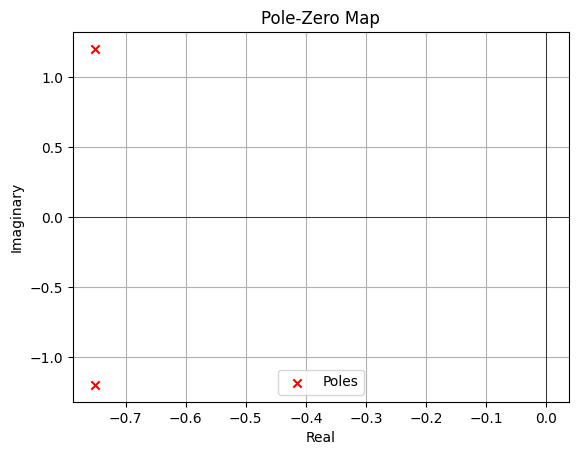

In [529]:
poles = control.poles(sys)
zeros = control.zeros(sys)

plt.figure()
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='red', label='Poles')
# plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='blue', label='Zeros')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Pole-Zero Map Open loop system')
plt.legend()
plt.grid(True)
plt.show()

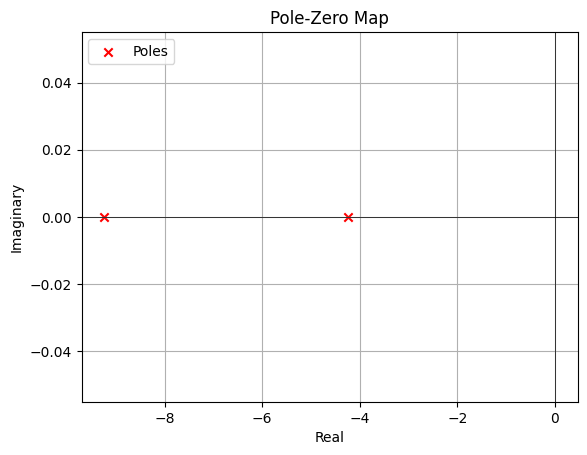

In [530]:
poles = control.poles(sys_obs)
# zeros = control.zeros(sys_obs)

plt.figure()
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='red', label='Poles')
# plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='blue', label='Zeros')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Pole-Zero Map Observer')
plt.legend()
plt.grid(True)
plt.show()

Simulate the open loop system and the observer

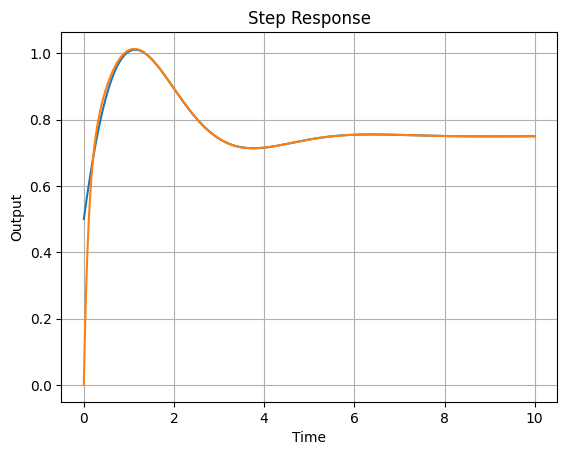

In [531]:
from control import matlab

t = np.linspace(0, 10, 1000)
u = np.ones_like(t)

y1, t, x1 = control.matlab.lsim(sys, U=u, T=t, X0=[0.5, 0])

u_obs = np.vstack((u, y1)).T
y2, t, x2 = control.matlab.lsim(sys_obs, U=u_obs, T=t, X0=[0,0])

# Plot the response
plt.plot(t, y1)
plt.plot(t, y2)
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('Simulation - control.matlab.lsim module')
plt.grid(True)
plt.show()

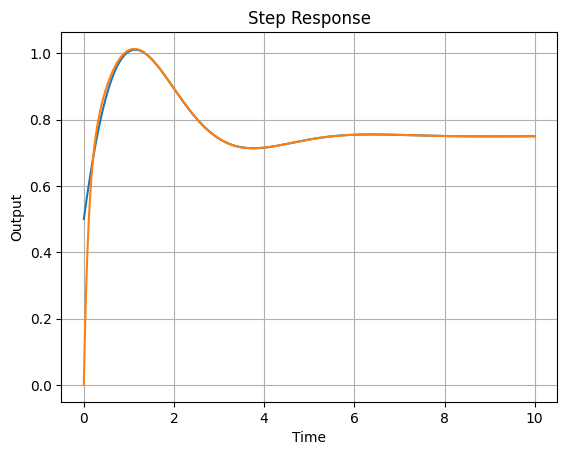

In [532]:
t = np.linspace(0, 10, 1000)
u = np.ones_like(t)

t1, y1 = control.forced_response(sys, T=t, X0=[0.5,0], U=u)
u_obs = np.vstack((u, y1))
t2, y2 = control.forced_response(sys_obs, T=t, X0=[0,0], U=u_obs)

# Plot the response
plt.plot(t, y1)
plt.plot(t, y2[0])
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('Simulation - control.forced_response module')
plt.grid(True)
plt.show()

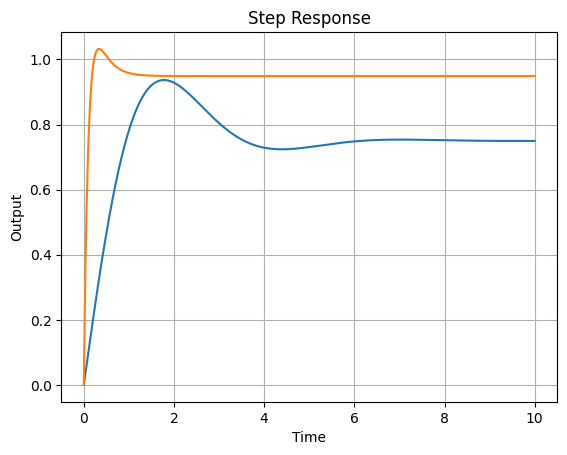

In [533]:
t = np.linspace(0, 10, 1000)
u = np.ones_like(t)

t1, y1 = control.step_response(sys, T=t, X0=[0,0], input=u)
t2, y2 = control.step_response(sys_obs, T=t, X0=[0,0], input=[u, y1])

# Plot the response
plt.plot(t, y1)
plt.plot(t, y2[0,0])
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('Step Response')
plt.grid(True)
plt.show()